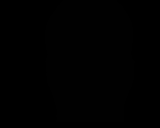

50


In [79]:
from PIL import Image

#160x128
pil_img = Image.open('test.tif').convert('L')
display(pil_img)

# pil_img = Image.open('billnye.jpg').convert('L')
# display(pil_img)

In [80]:
import cv2
import numpy as np

img = np.array(pil_img)
# gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)


print(img)


# print(np.max(img))

# # normalize from [0,255]
# cv2.normalize(img, img, 0, 255, cv2.NORM_MINMAX)
# img = cv2.equalizeHist(img)

# print(np.max(img))

[[39 38 35 ... 50 50 41]
 [36 39 39 ... 50 53 47]
 [36 41 42 ... 53 50 44]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


[(8, 135, 112, 31)]
[{'chin': [(42, 40), (42, 51), (44, 62), (46, 74), (49, 84), (55, 94), (63, 102), (72, 109), (83, 111), (94, 109), (104, 103), (111, 95), (116, 84), (119, 74), (121, 63), (123, 52), (124, 41)], 'left_eyebrow': [(48, 32), (53, 27), (59, 26), (66, 27), (72, 30)], 'right_eyebrow': [(94, 31), (100, 28), (107, 28), (113, 29), (118, 33)], 'nose_bridge': [(83, 40), (82, 48), (82, 57), (82, 66)], 'nose_tip': [(74, 68), (78, 70), (83, 72), (87, 70), (92, 68)], 'left_eye': [(56, 39), (60, 36), (66, 37), (70, 40), (65, 41), (60, 41)], 'right_eye': [(95, 41), (100, 38), (106, 38), (110, 41), (106, 42), (101, 42)], 'top_lip': [(67, 80), (72, 77), (79, 76), (83, 77), (88, 76), (95, 77), (100, 80), (98, 81), (88, 80), (83, 80), (79, 79), (70, 80)], 'bottom_lip': [(100, 80), (95, 88), (89, 91), (83, 91), (78, 90), (72, 87), (67, 80), (70, 80), (78, 84), (83, 85), (88, 85), (98, 81)]}]


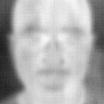

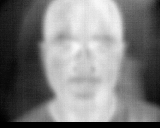

In [59]:
import face_recognition

face_locations = None

testfile = 'test2.tif'

image = face_recognition.load_image_file(testfile, mode='L')
img = np.array(image)

####
#cv2.normalize(img, img, 0, 255, cv2.NORM_MINMAX)
#img = cv2.equalizeHist(img)
#img = cv2.Canny(img,100,200)



face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0)
face_landmarks = face_recognition.face_landmarks(image)

print(face_locations)
print(face_landmarks)


if face_locations:
#if face_landmarks:

    face_roi = None
    # draw boxes around ROI
    for (top,right,bottom,left) in face_locations:
    # for (top,right,bottom,left) in face_landmarks[0]['nose_tip']:

        face_roi = img[top:bottom,left:right]
        # cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 4)


    # display(Image.fromarray(img))
    display(Image.fromarray(face_roi))
    display(pil_image)


# for face_location in face_locations:

#     # Print the location of each face in this image
#     top, right, bottom, left = face_location
#     print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

#     # You can access the actual face itself like this:
#     face_image = image[top:bottom, left:right]
#     pil_image = Image.fromarray(face_image)
#     pil_image.show()

# [(17, 126, 106, 36)]

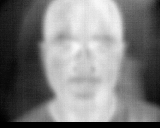

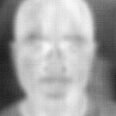

In [61]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

# detect
faces = face_cascade.detectMultiScale(img, minSize=(50,100), scaleFactor=1.05, minNeighbors=0, flags=cv2.CASCADE_SCALE_IMAGE)

face_roi = None
# draw boxes around ROI
for (x,y,w,h) in faces:
    face_roi = img[y:y+h,x:x+w]
    # cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 4)
    

display(Image.fromarray(img))
display(Image.fromarray(face_roi))

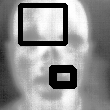

In [486]:
nose_cascade = cv2.CascadeClassifier('haarcascade_mcs_nose.xml')
# nose_cascade = cv2.CascadeClassifier('Nariz.xml')

noses = None
# detect
noses = nose_cascade.detectMultiScale(face_roi, scaleFactor=1.05, maxSize=(50,50), minNeighbors=0, flags=cv2.CASCADE_SCALE_IMAGE)
# faces = face_cascade.detectMultiScale(img, scaleFactor=1.05)

# draw boxes around ROI
for (x,y,w,h) in noses:
    cv2.rectangle(face_roi, (x,y), (x+w,y+h), (0,0,255), 4)

display(Image.fromarray(face_roi))